<a href="https://colab.research.google.com/github/raditya2010631170111/colaboratory-python/blob/main/df_20111_Raditya%20Aji%20Sasmoyo_2010631170111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Silahkan dipilih kang, antara Algoritma Forecasting & Clustering

#Metode Forecasting

##Dataset

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
df = pd.read_csv('https://raw.githubusercontent.com/raditya2010631170111/colaboratory-python/main/df_20111/melb_data.csv')
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Pemilihan Data: Agar lebih mudah dianalisis maka data yang dipakai hanya Postcode 3067-3206 dan 2 column

In [ ]:
df = df.iloc[0:242]
df = df[['Date', 'Price']]
df.head()

,Date,Price
0,3/12/2016,1480000.0
1,4/02/2016,1035000.0
2,4/03/2017,1465000.0
3,4/03/2017,850000.0
4,4/06/2016,1600000.0


## Statistical Approach

### Simple Moving Average

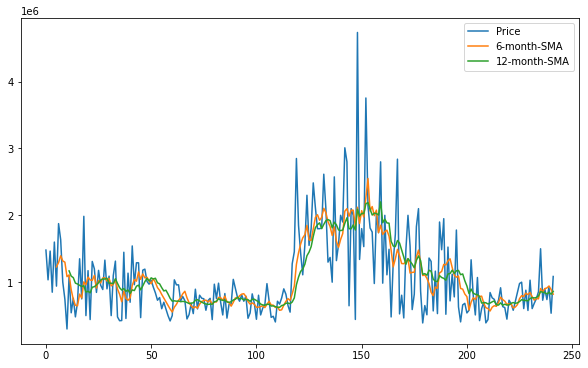

In [ ]:
df_sma = df.copy()
df_sma['6-month-SMA'] = df['Price'].rolling(window=6).mean()
df_sma['12-month-SMA'] = df['Price'].rolling(window=12).mean()
df_sma.plot()

data bersifat stationer = tidak berpola


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


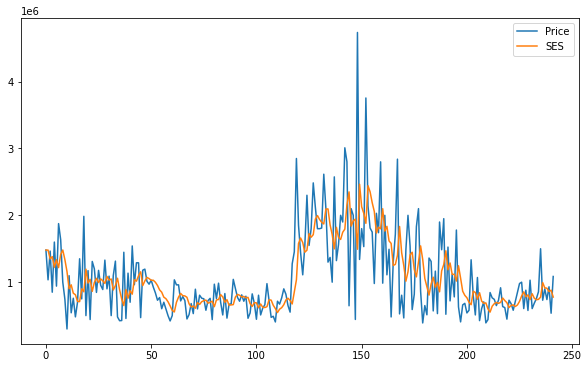

In [ ]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df_ses = df.copy()
model_ses = SimpleExpSmoothing(df['Price'])
fitted_model_ses = model_ses.fit(smoothing_level=0.3,optimized=False,use_brute=True) # bisa masukin alpha
df_ses['SES'] = fitted_model_ses.fittedvalues
df_ses.plot()

### Exponential Smoothing

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


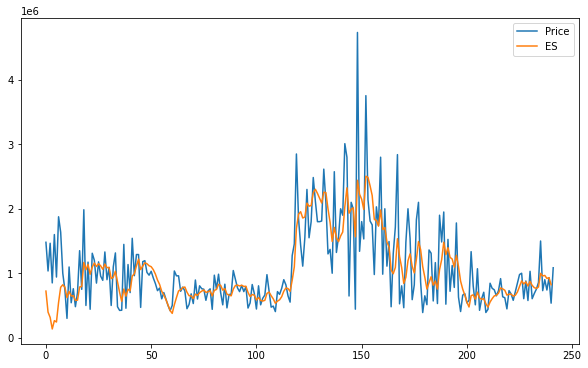

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df_es = df.copy()
model = ExponentialSmoothing(df['Price'], trend = 'add') # try mul
fitted_model = model.fit()
df_es['ES'] = fitted_model.fittedvalues.shift(-1)
df_es.plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


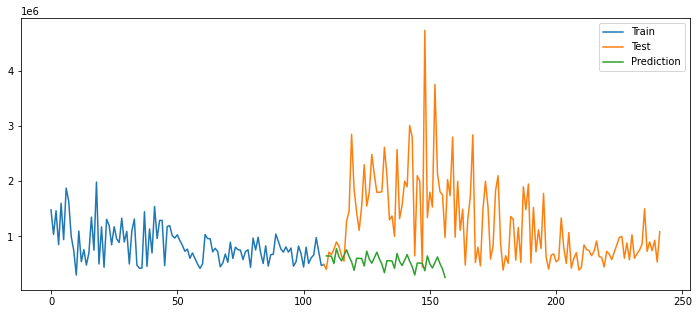

In [ ]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]
fitted_model = ExponentialSmoothing(train_data['Price'],
                                   trend = 'add', # try mul
                                   seasonal = 'add', # try mul
                                   seasonal_periods = 12).fit()
test_predictions = fitted_model.forecast(48)
train_data['Price'].plot(legend=True, label = 'Train',
                             figsize = (12,5))
test_data['Price'].plot(legend=True, label = 'Test')
test_predictions.plot(legend=True, label = 'Prediction')

###ARIMA

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


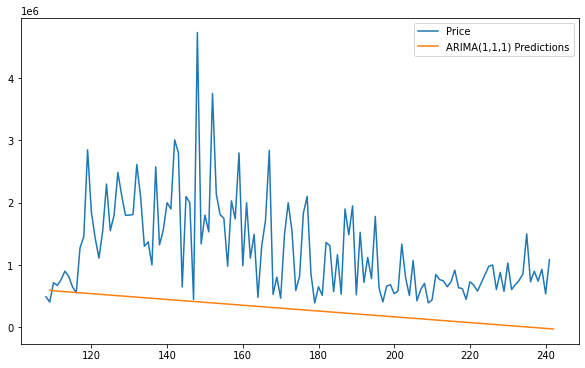

In [ ]:
# ARIMA
start=len(train_data)
end=len(train_data)+len(test_data)-1
model=ARIMA(train_data['Price'],order=(1,1,1)) # (p -> AR, d -> I (stationarity) , q -> MA)
results=model.fit()
# predictions
predictions=results.predict(start,end,typ='levels').rename('ARIMA(1,1,1) Predictions')
test_data['Price'].plot(legend=True)
predictions.plot(legend=True)

In [ ]:
print("ARIMA")
print("MAE: ",mean_absolute_error(test_data['Price'],predictions))
print("MSE: ",mean_squared_error(test_data['Price'],predictions))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['Price'],predictions)))
print("R2: ",r2_score(test_data['Price'],predictions))
print("")

ARIMA
MAE:  959058.9919756472
MSE:  1388862605478.999
RMSE:  1178500.150818403
R2:  -1.4774603147728649



1. Kita pakai MAE agar tidak angka negatif
2. MSE pasti positif dan lebih besar dari MAE

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


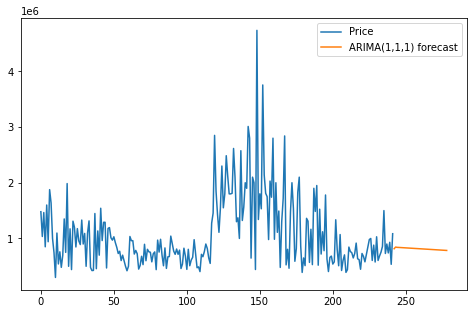

In [ ]:
# Forecast melihat masa depan
model=ARIMA(df['Price'],order=(1,1,1))
results=model.fit()
fcast=results.predict(start=len(df),end=len(df)+36,typ='levels').rename('ARIMA(1,1,1) forecast')
df['Price'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

Grafik di atas menunjukkan garis jingga yaitu perkiraan nilai Price kedepannya dengan ARIMA

ARIMA mirip seperti MAE yaitu perkiraan bisa lebih atau kurang dari garis jingga di atas.

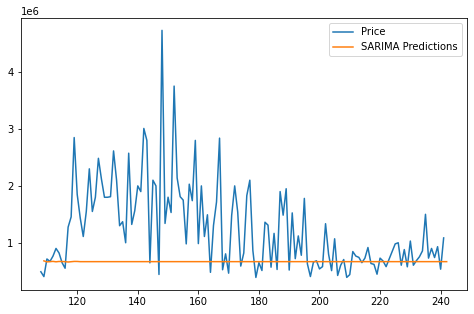

In [ ]:
model=SARIMAX(train_data['Price'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
predictions1=results.predict(start,end,typ='levels').rename('SARIMA Predictions')
test_data['Price'].plot(legend=True,figsize=(8,5))
predictions1.plot(legend=True)

In [ ]:
print("SARIMAX")
print("MAE: ",mean_absolute_error(test_data['Price'],predictions1))
print("MSE: ",mean_squared_error(test_data['Price'],predictions1))
print("RMSE: ", np.sqrt(mean_squared_error(test_data['Price'],predictions1)))
print("R2: ",r2_score(test_data['Price'],predictions1))
print("")

SARIMAX
MAE:  635313.341480943
MSE:  883074859193.3654
RMSE:  939720.6282685112
R2:  -0.5752335112159368



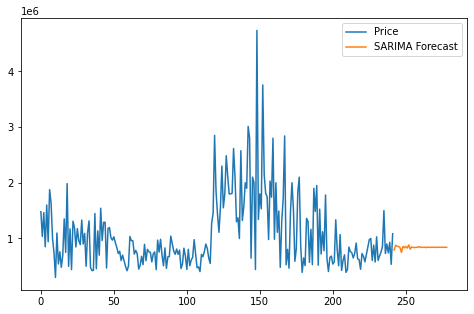

In [ ]:
model=SARIMAX(df['Price'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
fcast=results.predict(start=len(df),end=len(df)+36,typ='levels').rename('SARIMA Forecast')
df['Price'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

Grafik di atas menunjukkan garis jingga yaitu perkiraan nilai Price kedepannya dengan SARIMA

Tidak seperti ARIMA, perkiraan SARIMA tidak konstan mirip seperti data tahun sebelumnya, maka SARIMA lebih akurat

#Metode Clustering Mengelompokan Berbagai Price dari Penjualan Para Seller Berdasarkan Jenis Metode Penjualan Mereka menggunakan Algoritma K-Means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/melb_data.csv")
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Pemilihan Data: Data yang dipakai hanya Postcode 3067-3042 dan tiga column

In [ ]:
df1 = df.iloc[0:117]
#show a column df1.loc[:,'Postcode']
df2 = df1[['SellerG', 'Method', 'Price']]
df2.head()

,SellerG,Method,Price
0,Biggin,S,1480000.0
1,Biggin,S,1035000.0
2,Biggin,SP,1465000.0
3,Biggin,PI,850000.0
4,Nelson,VB,1600000.0


Data Cleansing

In [ ]:
df2.isnull().any()

SellerG    False
Method     False
Price      False
dtype: bool

Data Transformation - One Hot Encoding

In [ ]:
df3 = df2['Method']
df3 = pd.get_dummies(df3, columns=['Method'])
df2 = df2.join(df3)
df4 = df2.rename(columns={'S': 'Method_S', 'SP': 'Method_SP', 'PI': 'Method_PI', 'VB': 'Method_VB'})
df5 = df4[['SellerG', 'Method_S', 'Method_SP', 'Method_PI', 'Method_VB', 'Price']]
df5.head()

,SellerG,Method_S,Method_SP,Method_PI,Method_VB,Price
0,Biggin,1,0,0,0,1480000.0
1,Biggin,1,0,0,0,1035000.0
2,Biggin,0,1,0,0,1465000.0
3,Biggin,0,0,1,0,850000.0
4,Nelson,0,0,0,1,1600000.0


In [ ]:
df7 = pd.read_csv("https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/melb_data_transform.csv")
df7

,SellerG,Method_S,Method_SP,Method_PI,Method_VB,Price
0,Biggin,15,3,2,1,20071500
1,Nelson,16,4,4,8,27060500
2,Jellis,10,2,0,1,12385000
3,Dingle,1,0,0,0,542000
4,Purplebricks,0,1,0,0,481000
5,Greg,0,2,0,0,867000
6,LITTLE,1,0,0,0,1176500
7,Collins,3,0,0,0,2997000
8,Kay,0,0,1,0,1330000
9,Beller,1,0,0,0,900000


Pengelompokan Data

langkah-langkah dari algoritma K-means sebagai berikut:
1. Menentukan Jumlah cluster.
2. Menentukan centroid/titik pusat cluster secara acak.
3. Menghitung Jarak setiap data terhadap masing-masing centroid. Rumus untuk menghitung jarak menggunakan rumus jarak Euclidean (Euclidean Distance) dengan persamaan (1) sebagai berikut:

d(i, j) = √∑𝑚 k=1 (𝑋𝑖𝑗 − 𝐶𝑘𝑗)2

4. Mengelompokkan data berdasarkan jarak terdekat antara data dengan centroid.
5. Menentukan nilai centroid yang baru dengan menghitung rata-rata dari cluster yang bersangkutan, dengan persamaan (2) sebagai berikut:

𝐶𝑘=  1/nk  ∑ 𝑑𝑖

6. Lakukan perulangan dari Langkah 3-5 hingga anggota tiap cluster tidak ada yang berubah.

Seleksi Fitur - K-Means Clustering Elbow Method

menghapus fitur prediktor ('SellerG') dan menetapkan target ('Price')

In [ ]:
import plotly.graph_objects as go
X = df7.drop("SellerG",axis=1)
clusters = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  clusters.append(kmeans.inertia_)
  print('K : '+str(i)+' Inertia : '+str(kmeans.inertia_))
fig = go.Figure(data=go.Scatter(x=np.arange(1,10),y=clusters))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,10],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=clusters[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

K : 1 Inertia : 1157551621834033.8
K : 2 Inertia : 135673854825093.44
K : 3 Inertia : 39285639762568.92
K : 4 Inertia : 14862579262541.4
K : 5 Inertia : 6059482361138.943
K : 6 Inertia : 2342581236125.4443
K : 7 Inertia : 652527266246.4805
K : 8 Inertia : 318391490488.80475
K : 9 Inertia : 144060558345.2333


Berdasarkan grafik diatas, cluster paling optimal ialah 3 maka terbentuk 3 kelompok diantaranya cluster 0 (C0), cluster 1 (C1), cluster 2 (C2).

**Sebelum dilakukan Clustering**

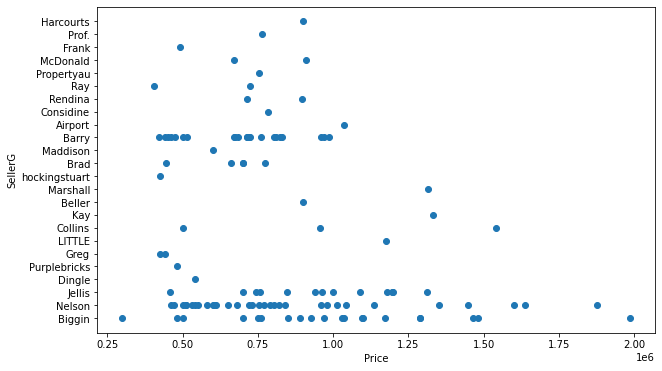

In [ ]:
plt.scatter(df1['Price'], df1['SellerG'])
plt.xlabel('Price')
plt.ylabel('SellerG')
plt.show()

**Sesudah dilakukan Clustering, Cluster Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



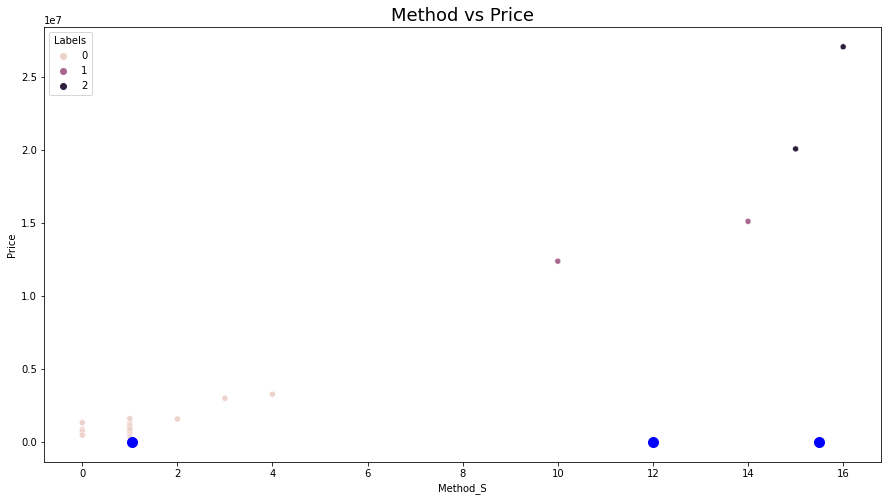

In [ ]:
n_clustter = 3
km = KMeans(n_clusters=n_clustter, init='k-means++', random_state=0)
km.fit(X)
centroids = km.cluster_centers_
X['Labels'] = km.labels_
plt.figure(figsize=(15,8))
sns.scatterplot(X['Method_S'], X['Price'], hue=X['Labels'])
plt.scatter(centroids[:,0], centroids[:,1], c='blue', s=100)
plt.title('Method vs Price', fontsize=18)
plt.show()

Terlihat sekarang data lebih tertata karena dikelompokan menjadi 3 kelompok cluster

**Evaluation Silhouette Coefficient**

In [ ]:
from sklearn.metrics import silhouette_score
pred = km.fit_predict(X)
shil_avg = silhouette_score(X, pred)
print('Nilai Rata - Rata Silhouette : '+str(shil_avg))

Nilai Rata - Rata Silhouette : 0.8561740700648648


Hasil evaluasi pengelompokan dengan silhouette coefficient menghasilkan nilai 0,85 yang menunjukkan bahwa kriteria pengelompokan yang dilakukan termasuk dalam struktur cluster kuat (strong structure).

**Result Interpretation**

In [ ]:
X['Labels']

0     2
1     2
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: Labels, dtype: int32

In [ ]:
print(X.sort_values(by='Labels'))

    Method_S  Method_SP  Method_PI  Method_VB     Price  Labels
11         1          0          0          0    423500       0
21         0          1          0          0    490000       0
20         2          0          0          0   1581500       0
19         0          0          1          0    755000       0
18         1          0          1          0   1130000       0
17         1          0          1          0   1610000       0
16         1          0          0          0    785000       0
15         1          0          0          0   1035000       0
13         1          0          0          0    600000       0
12         4          0          1          0   3280000       0
22         1          0          0          0    765000       0
23         1          0          0          0    900000       0
9          1          0          0          0    900000       0
8          0          0          1          0   1330000       0
7          3          0          0      

Di atas ialah Table setelah dikelompokkan menjadi 3 kelompok diantaranya cluster 0 (C0), cluster 1 (C1), cluster 2 (C2).

Ketiga cluster tersebut meliputi:
1. cluster 0 (C0) yang mencakup 20 Seller: Biggin, Nelson, Jellis, Dingle, Purplebricks, Greg, LITTLE, Collins, Kay, Beller, Marshall, hockingstuart, Brad, Maddison, Barry, Airport, Considine, Rendina, Ray, Propertyau
2. cluster 1 (C1) yang mencakup 2 Seller: McDonald, Frank, dan
3. cluster 2 (C2) yang mencakup 2 Seller: Prof, Harcourts